# HW 1 

In [1]:
import Pkg;
using Plots

In [2]:
function adaptive_hill_climbing(f, n, p_m=rand(Float64), max_iter=1000)
    # f: function to optimize   
    # n: the number of dimensions of the problem
    # p_m: the probability of mutation, random if not provided. 
    # max_iter: maximum number of iterations, 1000 if not provided.

    # Randomly generate the starting point
    # Assuming the bounds of the Ackley given here 
    # https://www.sfu.ca/~ssurjano/ackley.html
    # which is [-32.768, 32.768] for all dimensions.
    x0 = 2 * 32.768 * (rand(Float64, n) .- .5)
    
    iter = 0
    num_mutations = 0
    while iter < max_iter
        # Search around x0
        x1 = x0

        # for each solution feature q=1,...,n
        for q = 1:n
            # generate a uniformly distributed random number r from 0 to 1. 
            r = rand(Float64)

            # if r is less than the probability of mutation then we mutate
            # this feature by randomly generating another value in this bounds
            if r < p_m 
                # Replace the q-th solution feature of x1 with a random mutation
                x1[q] = 2 * 32.768 * (rand(Float64) - .5)
            end 
        end

        # If the new solution x1 is better than the previous best then we save
        # it as the current best. 
        if f(x1) < f(x0)
            x0 = x1
        end
        
        iter += 1
    end

    x = x0
   
    # return the best value found
    return x, f(x)        
end

adaptive_hill_climbing (generic function with 3 methods)

In [3]:
function ackley(x)
    # find the dimension of the variable. save it in d.
    d = size(x)[1]
    # the Ackley as defined by https://www.sfu.ca/~ssurjano/ackley.html
    return (-20 * exp(-0.2 * sqrt((1 / d) * sum([val^2 for val in x]))) - exp((1 / d) * sum([cos(2π * val) for val in x])) + 20 + exp(1))
end

ackley (generic function with 1 method)

## a.) 20 Monte Carlo Simulations for 2D Ackley

In [4]:
repetitions = 20
# for 10 maturation rates
for k = 1:10
    # save the sum to calculate the average
    sim_sum = 0
    # for this ackley the max is around 23, so this high number should set the min on the 
    # first iteration.
    min_val = 9999999999
    # Number of Monte Carlo simulations
    for i = 1:repetitions
        # get the results and add it to calculate the average.
        output = adaptive_hill_climbing(ackley, 2, (k/10))[2]
        sim_sum = sim_sum + output
        # save it if it is the new min
        if output < min_val
            min_val = output
        end
    end
    avg = sim_sum / repetitions
    println([k, min_val, avg])
end

[1.0, 3.0987211997016044, 19.349466791356356]
[2.0, 16.18295330232851, 20.802371265449864]
[3.0, 14.636999462035313, 19.828482564384583]
[4.0, 10.088303523631438, 20.28520320498653]
[5.0, 15.42689072709252, 20.598322686614374]
[6.0, 13.133604087844642, 20.301927176503092]
[7.0, 16.179671813427646, 20.542007210562133]
[8.0, 14.190678319725613, 20.617530793774726]
[9.0, 8.295113340035385, 19.130583340956356]
[10.0, 17.434985066207737, 20.631772743415702]


## Results of a.)
| Muturation Rate p_m | Minimum Value | Average Value |
| --- | --- | --- |
| 1/10 | 18.451 | 20.804 |
| 2/10 | 15.189 | 20.518 |
| 3/10 | 12.887 | 19.536 |
| 4/10 | 15.079 | 20.655 |
| 5/10 | 17.330 | 20.352 |
| 6/10 | 3.331 | 19.138 |
| 7/10 | 17.132 | 20.658 |
| 8/10 | 18.825 | 20.700 |
| 9/10 | 5.272 | 18.936 |
| 10/10 | 18.473 | 20.723 |

The best mutation rate is 9/10 based on the average value from the adaptive hill climbing algo. If we calculate the best mutation rate based on the minimum value, then it would be 6/10.

## b.) Repeat part a.)

In [5]:
# for 10 maturation rates
for k = 1:10
    # save the sum to calculate the average
    sim_sum = 0
    # for this ackley the max is around 23, so this high number should set the min on the 
    # first iteration.
    min_val = 9999999999
    # Number of Monte Carlo simulations
    for i = 1:repetitions
        # get the results and add it to calculate the average.
        output = adaptive_hill_climbing(ackley, 2, (k/10))[2]
        sim_sum = sim_sum + output
        # save it if it is the new min
        if output < min_val
            min_val = output
        end
    end
    avg = sim_sum / repetitions
    println([k, min_val, avg])
end

[1.0, 11.326979597874434, 20.23953782660885]
[2.0, 19.83710385559839, 21.280877734742027]
[3.0, 15.15521349333686, 20.292043657042328]
[4.0, 10.385861272249924, 20.1577179072424]
[5.0, 8.718580520950068, 20.471988446942582]
[6.0, 10.084403678276924, 20.03215037552587]
[7.0, 5.958200680710931, 18.775081368686365]
[8.0, 13.928283391504804, 20.48659090610044]
[9.0, 17.989807535947886, 20.59704089690758]
[10.0, 17.819461423978655, 20.384807252318712]


## Results of b.)
| Muturation Rate p_m | Minimum Value | Average Value |
| --- | --- | --- |
| 1/10 | 17.538 | 20.942 |
| 2/10 | 10.377 | 19.828 |
| 3/10 | 13.869 | 20.250 |
| 4/10 | 14.600 | 20.683 |
| 5/10 | 10.182 | 19.881 |
| 6/10 | 17.604 | 20.107 |
| 7/10 | 15.144 | 20.559 |
| 8/10 | 12.497 | 20.229 |
| 9/10 | 17.747 | 20.381 |
| 10/10 | 16.617 | 20.562 |

Best average value is for p_m = 2/10 and the best minimum value is for p_m = 5/10.  The results are much different than for part a.).
Based on this we can conclude that to get reproducible results, you would need to have more than 20 Monte Carlo simulations.

## c.) Repeat part a.) for 10-Dimensional Ackley.

In [6]:
# for p_m 1/10 to 10/10.
for k = 1:10
    # sum all of the outputs to calculate an average.
    sim_sum = 0
    # set min val higher than any possible Ackley output (~23 for this implementation)
    min_val = 9999999999
    # 20 Monte Carlo simulations
    for i = 1:repetitions
        # sum all of the outputs
        output = adaptive_hill_climbing(ackley, 10, (k/10))[2]
        sim_sum = sim_sum + output
        # save the min of the outputs 
        if output < min_val
            min_val = output
        end
    end
    avg = sim_sum / repetitions
    println([k, min_val, avg])
end

[1.0, 20.42933564060876, 21.15667348535537]
[2.0, 20.378121429288452, 21.145984732983457]
[3.0, 18.615755557511225, 21.12996067463089]
[4.0, 20.21128651254347, 21.123230352663633]
[5.0, 19.526648413537224, 21.128337283041937]
[6.0, 19.697978815652437, 21.15713033972882]
[7.0, 20.227712332659188, 21.125577856518454]
[8.0, 20.379020155253315, 21.219073195275797]
[9.0, 20.335097230503703, 21.375683217430595]
[10.0, 20.575918578120216, 21.167399364402815]


## Results of c.)
| Muturation Rate p_m | Minimum Value | Average Value |
| --- | --- | --- |
| 1/10 | 20.432 | 21.181 |
| 2/10 | 20.429 | 21.161 |
| 3/10 | 20.583 | 21.099 |
| 4/10 | 19.797 | 21.151 |
| 5/10 | 19.922 | 21.158 |
| 6/10 | 20.312 | 21.178 |
| 7/10 | 19.848 | 21.265 |
| 8/10 | 19.942 | 21.018 |
| 9/10 | 20.513 | 21.203 |
| 10/10 | 20.536 | 21.146 |

The best mutation rate is 8/10 based on the average value from the adaptive hill climbing algo. If we calculate the best mutation rate based
on the minimum value, then it would be 4/10.

There appears to be no relationship between the mutation rate and the problem dimension based on the results of the experiments a thru c. The results in c does not show any appreciable performance improvements with any of the maturation rates.

## Verification of Ackley Function

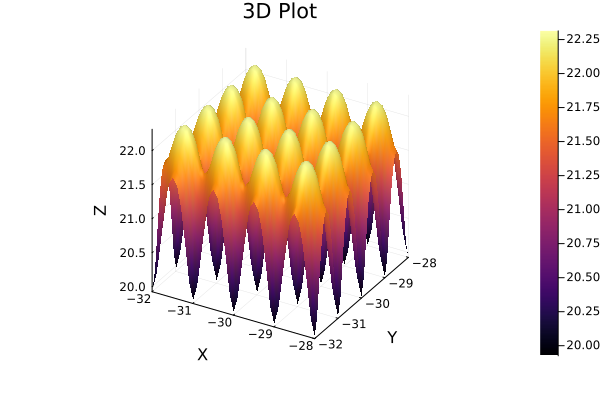

In [7]:
x_values = -32:.1:-28
y_values = -32:.1:-28
z_values = [ackley([i, j]) for i in x_values, j in y_values]
Plots.surface(x_values, y_values, z_values, xlabel="X", ylabel="Y", zlabel="Z", title="3D Plot")